# Modelagem e Simulação Multifísica - Aula 03

## 3 - Exemplo de um circuito RLC

### 3.1 - O problema de valor inicial

Considere o circuito RLC série da figura a seguir, alimentado por uma fonte de tensão ideal com tensão conhecida $V(t)$
<p>
    <img width="500" height="100" src="./Figs/RLC_geo.png">
</p>
<p>
    <em> <a href="https://www.circuitlab.com/editor/#?id=wt3nym"> Circuito RLC</a>. Fonte: https://www.circuitlab.com//</em>
</p>

A resposta transitória deste circuito pode ser visualizada na opção  <em> run -> time domain simulation </em> no link da figura 

Como o circuito possui apenas uma malha, o problema é governado pela lei de kirchhoff das tensões (LKT)

\begin{equation}
V(t) = V_R(t) + V_L(t) + V_C(t)
\end{equation}

onde $V_R(t)$, $V_L(t)$ e $V_C(t)$ representam respectivamente as tensões no resistor, indutor e capacitor. As tensões nos elementos se relacionam com a corrente do circuito por meio das equações:  

\begin{eqnarray}
V_R(t) &=& R i(t) \\
V_L(t) &=& L\frac{di(t)}{dt} \\
i(t) &=& C\frac{V_C(t)}{dt}
\end{eqnarray}

Assumindo que a fonte é ligada no instante de tempo $t_0$, o problema de valor inicial estará completo se são conhecidas a energia armazenada no capacitor e no indutor no momento imediatamente antes de $t_0$, ($t_{0^-}$). Esse valores podem ser inferidos se forem conhecidos os valores iniciais de $i(t_{0^-})$ e $V_C(t_{0^-})$. Assim, o PVI pode ser escrito como:

\begin{eqnarray}
V(t) &=& Ri(t) + L\frac{di(t)}{dt} + V_C(t) \\
i(t) &=& C\frac{V_C(t)}{dt} \\
i(t_0) &=& i_0 \\
V_C(t_0) &=& V_{0}
\end{eqnarray}

#### a) Instabilidade

Reparem que o sistema resultante é estável para $R>0$. Para o caso $R=0$ o sistema será marginalmente estável, assim como no caso do pêndulo sem amortecimento. 

### 3.2 - Representação por espaço de estados

A forma geral para a representação por espaço de estados de um sistema é 

\begin{eqnarray}
\dot x &=& Ax + Bu \\
y &=& Cx + Du
\end{eqnarray}

onde $x$ é um vetor contento as variáveis de estado, $u$ é o vetor contento as entradas do sistema e $y$ o vetor de saída. $A$ e $B$ são matrizes de coeficientes da equação de estado enquanto $C$ e $D$ são as matrizes da equação de saída. A equação de estado pode ser obtida reorganizando os termos da equação da LKT e a equação da corrente no capacitor. 

\begin{eqnarray}
\frac{di(t)}{dt} &=& -\frac{R}{L}i(t) - \frac{1}{L}V_C(t) + \frac{1}{L}V(t)\\
\frac{V_C(t)}{dt} &=& \frac{1}{C}i(t)
\end{eqnarray}

Assim, podemos definir $x_1 = i(t)$, $x_2=V_C(t)$ e $u=V(t)$. Dessa forma, a representação matricial da equação de estados do problema pode ser reescrita como:

\begin{eqnarray}
\begin{bmatrix}
\dot x_1    \\
\dot x_2    \\
\end{bmatrix}
=
\begin{bmatrix}
-\frac{R}{L}  &  -\frac{1}{L} \\
\frac{1}{C}      &   0    \\
\end{bmatrix}
\cdot
\begin{bmatrix}
x_1     \\
x_2     \\
\end{bmatrix}
+
\begin{bmatrix}
\frac{1}{L}    \\
0    \\
\end{bmatrix}
u
\end{eqnarray}

Definindo as variáveis de saída como $y_1 = V_R(t)$ e $y_2 = V_C(t)$, a equação de saída pode ser escrita como

\begin{eqnarray}
\begin{bmatrix}
y_1    \\
y_2    \\
\end{bmatrix}
=
\begin{bmatrix}
R  &  0 \\
0      &   1    \\
\end{bmatrix}
\cdot
\begin{bmatrix}
x_1     \\
x_2     \\
\end{bmatrix}
+
\begin{bmatrix}
0    \\
0    \\
\end{bmatrix}
u
\end{eqnarray}

### 3.3 - Resolvendo por meio da função solve_ivp

A seguir o método é ilustrado usando a configuração default "RK45 (default): Explicit Runge-Kutta method of order 5(4)".

Definindo os parâmetros do problema e a função de entrada $u(t)$:

In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

# Circuit parameters (International System of Units)
R = 100e-3
L = 1e-6
C = 25.33e-9

# Source parameters
freq = 50e3 # square wave frequency 
Amp = 1 # Voltage amplitude

# time domain simulation parameters
t_0 = 0
t_end = 30e-6

# PVI initial condition
x_0 = [0, 0] # initial condition [i_0, Vc_0]

# V(t) function
def v(t): # function f(x(t),t) 
    return Amp*signal.square(2 * np.pi*freq*t)

Definindo a função de entrada $\dot x = f(t,x)$ usada na função solve_ivp

In [2]:
def f(t,x): # function f(x(t),t) 
    A = np.array([[-R/L, -1/L], [1/C, 0]])
    B = np.array([1/L, 0])
    return A.dot(x)+B.dot(v(t))

Resolvendo o PVI e plotando as variáveis de saída.

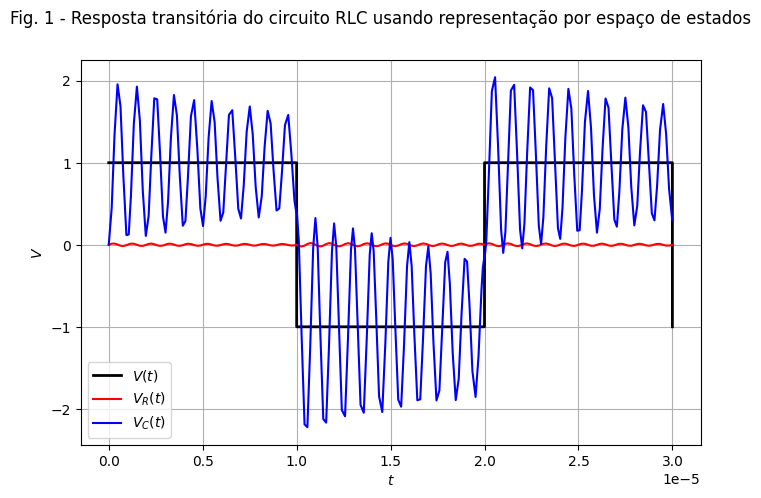

In [3]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

sol = solve_ivp(f, [t_0, t_end],x_0)

# plot horizontal line
fig = plt.figure(figsize=(8,5))
#plt.subplot(1, 2, 1)
plt.plot(sol.t, v(sol.t), 'k', linewidth=2); 
plt.plot(sol.t, R*sol.y[0,:], 'r', linewidth=1.5);
plt.plot(sol.t, sol.y[1,:], 'b', linewidth=1.5);
plt.grid(True);
plt.xlabel('$t$');
plt.ylabel('$V$');
plt.legend(['$V(t)$','$V_R(t)$', '$V_C(t)$'], loc='lower left');
fig.suptitle('Fig. 1 - Resposta transitória do circuito RLC usando representação por espaço de estados');